In [1]:
!pip install catboost

     |████████████████████████████████| 67.3MB 54kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
import xgboost
import lightgbm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, confusion_matrix, classification_report 
from sklearn.metrics import make_scorer, fbeta_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn .model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import pickle
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data=pd.read_csv('/content/Telco-Customer-Churn-dataset.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Analyse sweetviz  report

In [5]:
#my_report=sv.analyze(data)
#my_report.show_html()

In [6]:
# Number of Columns and Rows in the Dataset
data.shape

(7043, 21)

In [7]:
#Replacing all empty space with NaNs
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
Emp_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in Emp_cols:
    data[i]=data[i].replace("",np.nan)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we see that the totalcharges has 11 missing values. Let's see the complete data corresponding to these customers.

In [12]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


1. It can also be noted that the Tenure column is 0 for these entries even though the monthlycharges column is not empty.
2. Let's see if there are any other 0 values in the tenure column.

In [13]:
data[data['tenure'] == 0].index #no additional 0 values.


Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [15]:
data.shape

(7032, 21)

In [16]:
# Convert String values (Yes and No) of Churn column to 1 and 0
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1
#convert to integer .
data['Churn']=data['Churn'].astype('int32')

In [17]:
data['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [18]:

data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, '% of Churn')

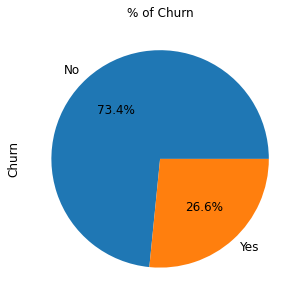

In [19]:
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

Numerical Features:

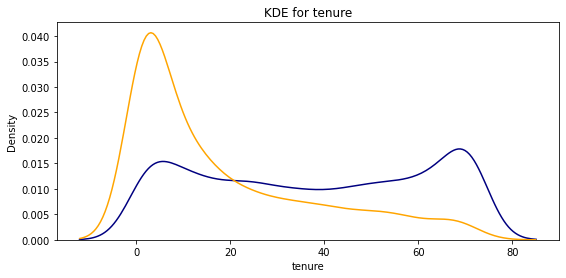

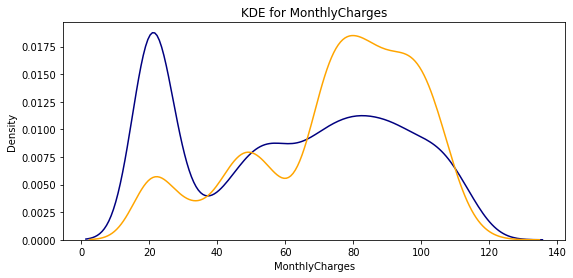

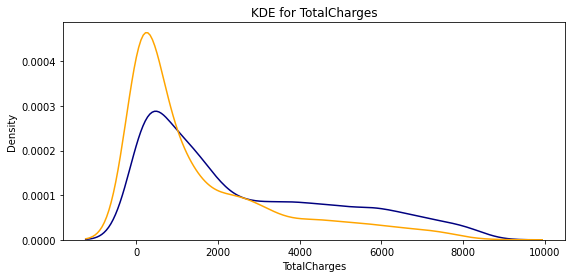

In [20]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1. Recent clients are more likely to churn.
2. Clients with higher MonthlyCharges are also more likely to churn.
3. Tenure and MonthlyCharges are probably important features.

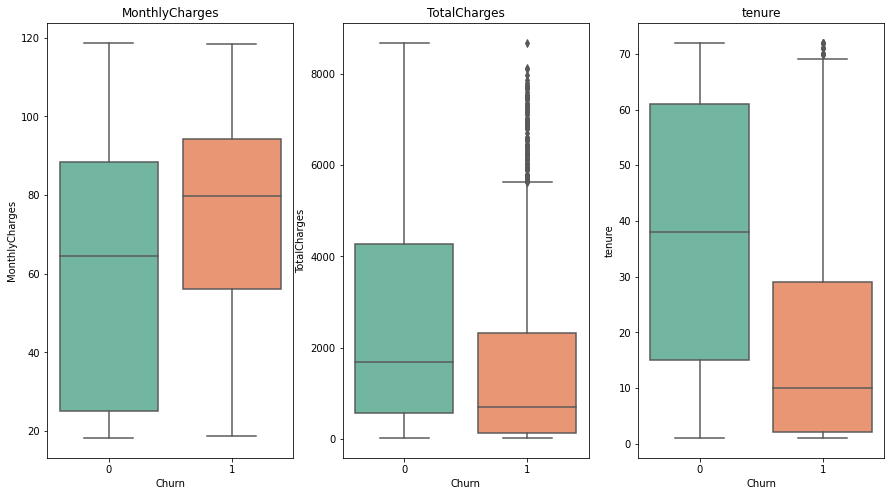

In [21]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=data["Churn"], y=data[variable], ax=subplot, palette = "Set2").set_title(str(variable))

1. The Monthly plan doesn't seem to be such a big driver of churn, but we can see that 75% of churners pay between 60 and 100 dollars a month
2. One important mark we can see in this plots that 50% of Churners leave the company before the first year goes by.

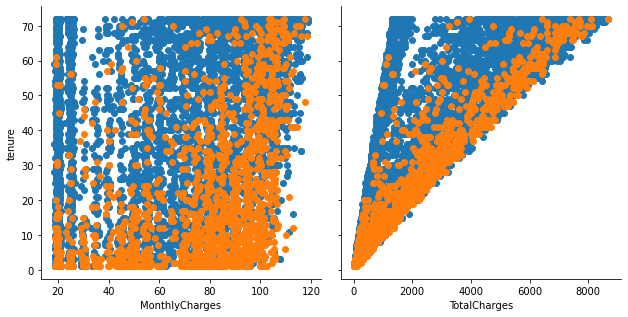

In [22]:
a=sns.PairGrid(data, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn")
ax = a.map(plt.scatter)

# Catagorical:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

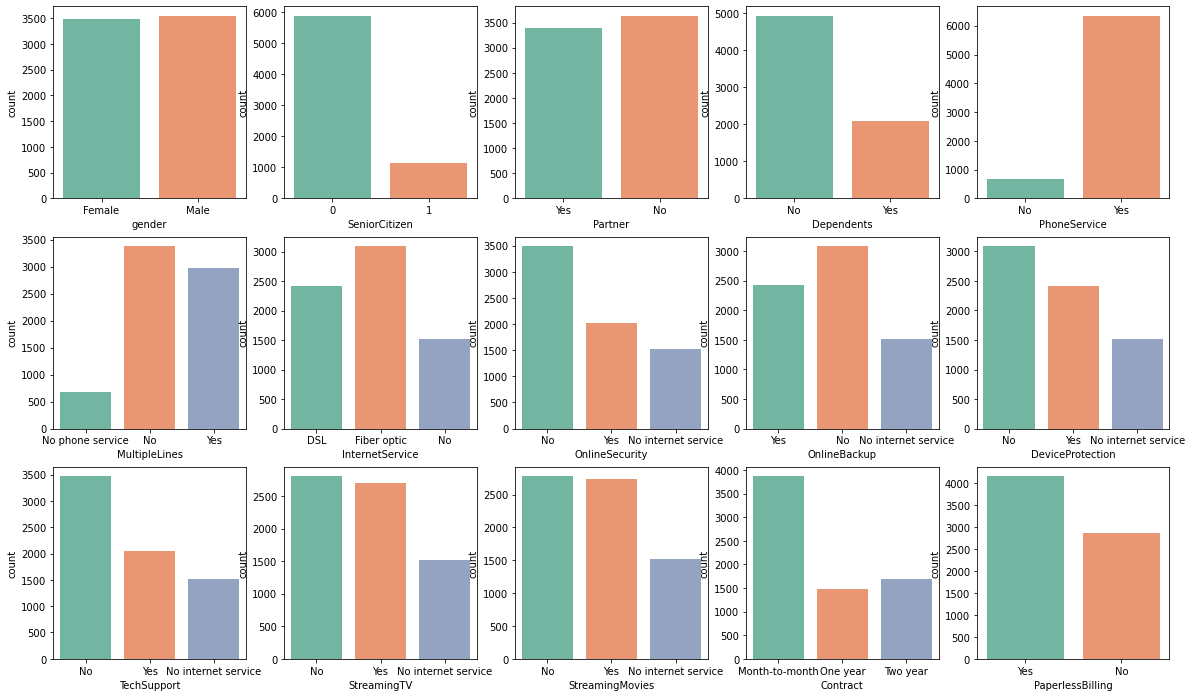

In [23]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot, palette = "Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


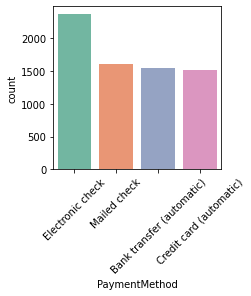

In [24]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data.PaymentMethod, palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

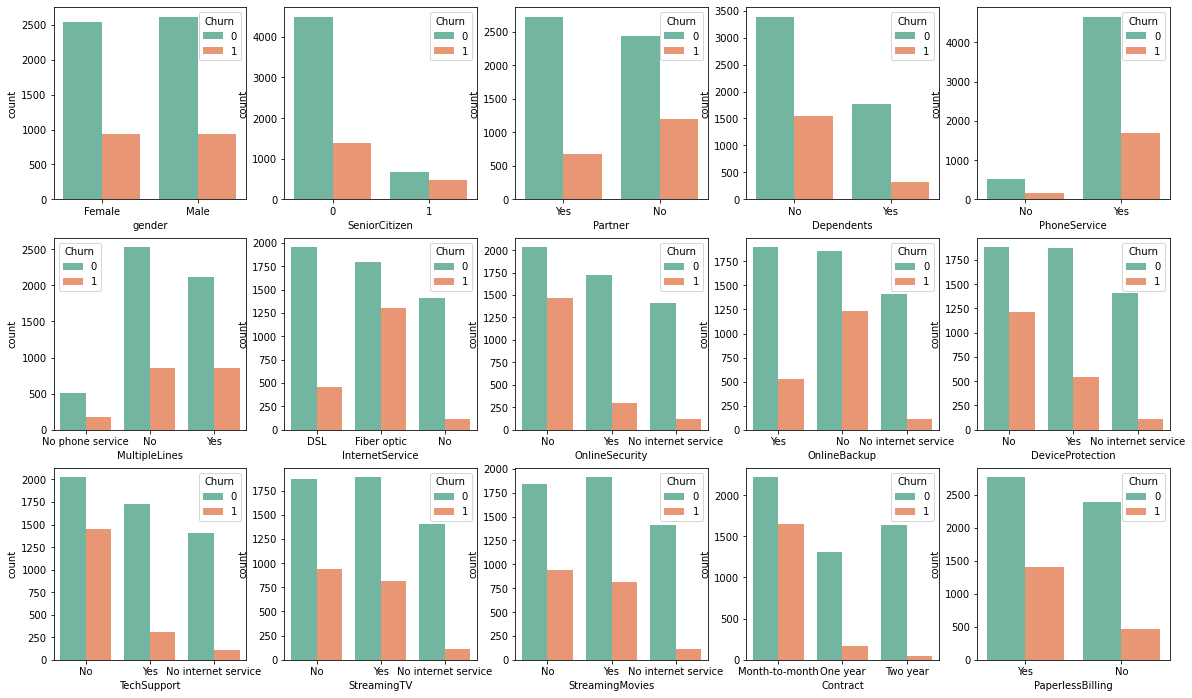

In [25]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable],hue=data["Churn"], ax=subplot, palette = "Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


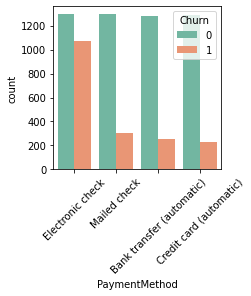

In [26]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data.PaymentMethod,hue=data["Churn"], palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [27]:
def stacked_plot(data, features, target):
    fig, ax = plt.subplots(figsize = (6,4))
    df = (data.groupby([features, target]).size()/data.groupby(features)[target].count()).reset_index().pivot(columns=target, index=features, values=0)
    df.plot(kind='bar', stacked=True, ax = ax, color = ["blue", "orange"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(features)
    ax.set_ylabel('Churn Percentage')

Demographics

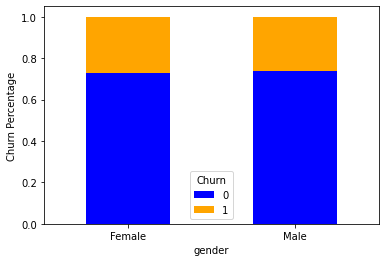

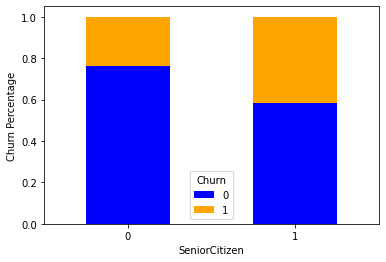

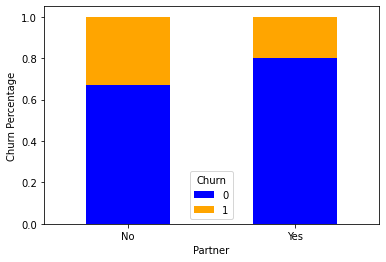

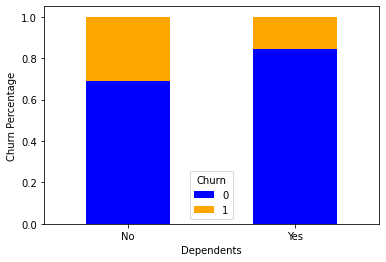

In [28]:
stacked_plot(data, "gender", "Churn")
stacked_plot(data, "SeniorCitizen", "Churn")
stacked_plot(data, "Partner", "Churn")
stacked_plot(data, "Dependents", "Churn")

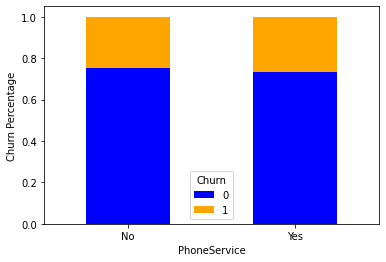

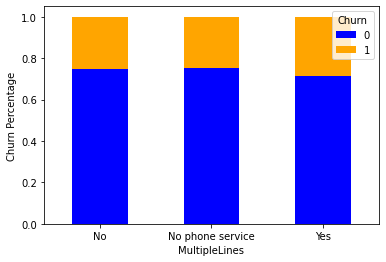

In [29]:
stacked_plot(data, "PhoneService", "Churn")
stacked_plot(data, "MultipleLines", "Churn")

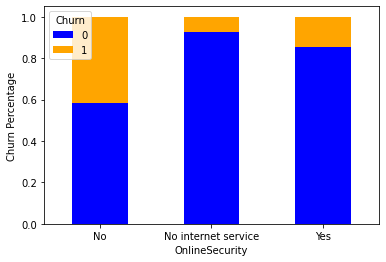

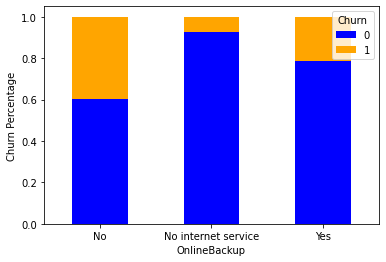

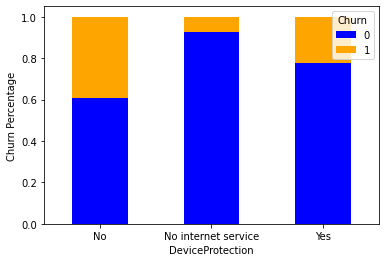

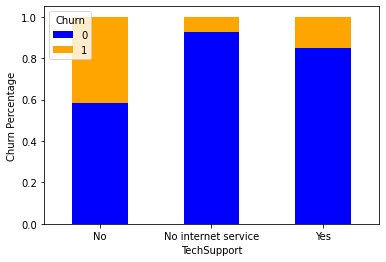

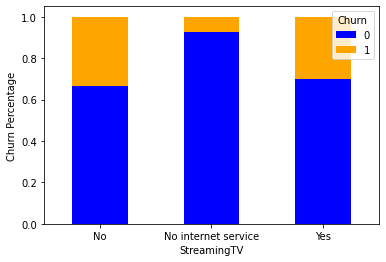

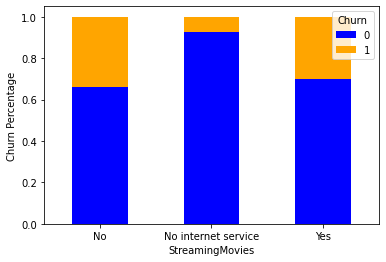

In [30]:
stacked_plot(data, "OnlineSecurity", "Churn")
stacked_plot(data, "OnlineBackup", "Churn")
stacked_plot(data, "DeviceProtection", "Churn")
stacked_plot(data, "TechSupport", "Churn")
stacked_plot(data, "StreamingTV", "Churn")
stacked_plot(data, "StreamingMovies", "Churn")

In [31]:
## phone service, multiple lines, internet service
display(pd.crosstab(data['Churn'], [data['PhoneService'], data['MultipleLines'], data['InternetService']], dropna=False))



PhoneService     No                                  ...              Yes                      
MultipleLines    No                No phone service  ... No phone service  Yes                 
InternetService DSL Fiber optic No              DSL  ...               No  DSL Fiber optic   No
Churn                                                ...                                       
0                 0           0  0              510  ...                0  616        1171  330
1                 0           0  0              170  ...                0   73         767   10

[2 rows x 18 columns]

In [32]:
## phone service, internet service, seniorcitizen
crosstab_cols = [data['PhoneService'], data['SeniorCitizen'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols, dropna=False))


PhoneService      No                     ...   Yes                     
SeniorCitizen      0                  1  ...     0    1                
InternetService  DSL Fiber optic No DSL  ...    No  DSL Fiber optic  No
Churn                                    ...                           
0                450           0  0  60  ...  1360  121         438  47
1                126           0  0  44  ...   108   34         393   5

[2 rows x 12 columns]

In [33]:
## phone service, internet service, gender
crosstab_cols = [data['PhoneService'], data['gender'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols, dropna=False))

PhoneService        No                      ...    Yes                      
gender          Female                Male  ... Female Male                 
InternetService    DSL Fiber optic No  DSL  ...     No  DSL Fiber optic   No
Churn                                       ...                             
0                  249           0  0  261  ...    690  731         910  717
1                   80           0  0   90  ...     56  150         633   57

[2 rows x 12 columns]

In [34]:
## internet service, streamingtv, streamingmovies
crosstab_cols = [data['StreamingTV'], data['StreamingMovies'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols))

StreamingTV       No                   ...         Yes                 
StreamingMovies   No              Yes  ...          No  Yes            
InternetService  DSL Fiber optic  DSL  ... Fiber optic  DSL Fiber optic
Churn                                  ...                             
0                839         483  292  ...         246  551         817
1                273         422   59  ...         194   78         493

[2 rows x 9 columns]

In [35]:
#contract & internet service 
crosstab_cols = [data['Contract'],data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols))

Contract        Month-to-month                   ... Two year                 
InternetService            DSL Fiber optic   No  ...      DSL Fiber optic   No
Churn                                            ...                          
0                          829         966  425  ...      611         398  628
1                          394        1162   99  ...       12          31    5

[2 rows x 9 columns]

# Check for Outliers in Numerical Features

In [36]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = data[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method.

# Feature Engineering

In [37]:
np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)

array([[1.        , 0.99955986],
       [0.99955986, 1.        ]])

In [38]:
data.drop('TotalCharges', axis = 1, inplace = True) #as correlation is high

Tenure

In [39]:
data['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [40]:
data['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

In [41]:
#to reduce data complexity make 5 groups
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

data["tenure_group"]=data["tenure"].apply(lambda x: tenure(x))

In [42]:
data.tenure_group.value_counts()

1    2175
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

In [43]:
data.drop('tenure', axis = 1, inplace = True)#drop as tenure_group is created

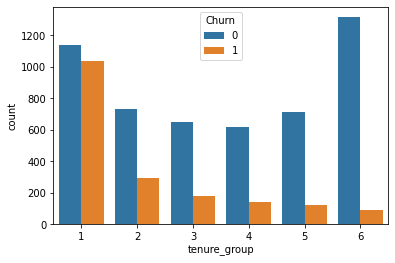

In [44]:
sns.countplot(x="tenure_group", hue="Churn", data=data)

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate. This also holds true in the log-rank test of survival analysis. So, I will drop them

In [45]:
data.drop(['MultipleLines', 'PhoneService',], axis = 1, inplace = True)

In [46]:
data.drop(['gender'],axis=1,inplace= True) #gender is also notimportance

In [47]:
data.drop(['customerID'],axis=1,inplace= True)

In [48]:
data.Partner = data.Partner.apply(lambda x: 0 if x == "No" else 1)
data.Dependents = data.Dependents.apply(lambda x: 0 if x == "No" else 1)
data.PaperlessBilling = data.PaperlessBilling.apply(lambda x: 0 if x == "No" else 1)

data = pd.get_dummies(data, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)
data.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Feature Selection

Feature Importance

In [49]:
#Create Feature variable X and Target variable y
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [51]:
#Feature selection by Chi2 test
#return F-score and P-value
from sklearn.feature_selection import chi2
F_P_Score=chi2(X_train,y_train)
F_P_Score

(array([ 122.70371489,   67.76676189,  113.48877084,   86.15479262,
        2959.46665472,  786.35956305,  300.51006218,  223.03914968,
         223.03914968,  107.13176711,  223.03914968,   26.46605652,
         223.03914968,   14.09684258,  223.03914968,  104.98241693,
         223.03914968,   11.41371626,  223.03914968,   12.10460772,
         140.71325076,  394.82581373,   94.6969697 ,  367.30285163,
          37.84801136]),
 array([1.61907907e-028, 1.84025698e-016, 1.68633647e-026, 1.66388188e-020,
        0.00000000e+000, 4.98619688e-173, 2.55062323e-067, 1.96556642e-050,
        1.96556642e-050, 4.16533521e-025, 1.96556642e-050, 2.68209778e-007,
        1.96556642e-050, 1.73635004e-004, 1.96556642e-050, 1.23224463e-024,
        1.96556642e-050, 7.29038546e-004, 1.96556642e-050, 5.02973771e-004,
        1.85885289e-032, 7.36729564e-088, 2.21878579e-022, 7.23523498e-082,
        7.64763001e-010]))

In [52]:
#plot importance features based on P-value
P_ranked_features=pd.Series(F_P_Score[1],index=X_train.columns)
P_ranked_features.sort_index(ascending= False)


tenure_group                             4.986197e-173
TechSupport_Yes                           1.232245e-24
TechSupport_No internet service           1.965566e-50
StreamingTV_Yes                           7.290385e-04
StreamingTV_No internet service           1.965566e-50
StreamingMovies_Yes                       5.029738e-04
StreamingMovies_No internet service       1.965566e-50
SeniorCitizen                             1.619079e-28
PaymentMethod_Mailed check                7.647630e-10
PaymentMethod_Electronic check            7.235235e-82
PaymentMethod_Credit card (automatic)     2.218786e-22
Partner                                   1.840257e-16
PaperlessBilling                          1.663882e-20
OnlineSecurity_Yes                        4.165335e-25
OnlineSecurity_No internet service        1.965566e-50
OnlineBackup_Yes                          2.682098e-07
OnlineBackup_No internet service          1.965566e-50
MonthlyCharges                            0.000000e+00
InternetSe

# Correlation Analysis

In [53]:
#correlation
correlation = X_train.corr()
correlation

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.011396,-0.214753,0.145706,0.219678,0.009930,0.255967,-0.183404,-0.183404,-0.043108,-0.183404,0.064954,-0.183404,0.047944,-0.183404,-0.059475,-0.183404,0.109437,-0.183404,0.117625,-0.049375,-0.119726,-0.014178,0.171542,-0.154184
Partner,0.011396,1.000000,0.462026,-0.009811,0.088757,0.377433,-0.013103,0.005482,0.005482,0.146338,0.005482,0.138951,0.005482,0.151734,0.005482,0.122176,0.005482,0.126045,0.005482,0.123217,0.090208,0.246070,0.086223,-0.084577,-0.106542
Dependents,-0.214753,0.462026,1.000000,-0.109478,-0.108070,0.160548,-0.164392,0.131517,0.131517,0.098541,0.131517,0.027000,0.131517,0.020814,0.131517,0.074698,0.131517,-0.016391,0.131517,-0.028609,0.070176,0.205890,0.068752,-0.150093,0.045720
PaperlessBilling,0.145706,-0.009811,-0.109478,1.000000,0.355594,0.003269,0.331070,-0.320657,-0.320657,-0.003391,-0.320657,0.121636,-0.320657,0.104769,-0.320657,0.041490,-0.320657,0.227490,-0.320657,0.213834,-0.046792,-0.146470,-0.017559,0.215484,-0.208721
MonthlyCharges,0.219678,0.088757,-0.108070,0.355594,1.000000,0.240604,0.787358,-0.764398,-0.764398,0.295038,-0.764398,0.438960,-0.764398,0.472388,-0.764398,0.341773,-0.764398,0.630208,-0.764398,0.622570,0.002982,-0.068058,0.027521,0.273705,-0.383303
tenure_group,0.009930,0.377433,0.160548,0.003269,0.240604,1.000000,0.014663,-0.038490,-0.038490,0.312899,-0.038490,0.355067,-0.038490,0.353945,-0.038490,0.316375,-0.038490,0.277646,-0.038490,0.282486,0.209312,0.549094,0.230538,-0.207526,-0.233086
InternetService_Fiber optic,0.255967,-0.013103,-0.164392,0.331070,0.787358,0.014663,1.000000,-0.466301,-0.466301,-0.027573,-0.466301,0.163407,-0.466301,0.159425,-0.466301,-0.011342,-0.466301,0.330087,-0.466301,0.315126,-0.078312,-0.206883,-0.052868,0.342619,-0.309536
InternetService_No,-0.183404,0.005482,0.131517,-0.320657,-0.764398,-0.038490,-0.466301,1.000000,1.000000,-0.332443,1.000000,-0.380293,1.000000,-0.379093,1.000000,-0.334620,1.000000,-0.416258,1.000000,-0.420649,0.043033,0.208942,0.001098,-0.285475,0.326919
OnlineSecurity_No internet service,-0.183404,0.005482,0.131517,-0.320657,-0.764398,-0.038490,-0.466301,1.000000,1.000000,-0.332443,1.000000,-0.380293,1.000000,-0.379093,1.000000,-0.334620,1.000000,-0.416258,1.000000,-0.420649,0.043033,0.208942,0.001098,-0.285475,0.326919
OnlineSecurity_Yes,-0.043108,0.146338,0.098541,-0.003391,0.295038,0.312899,-0.027573,-0.332443,-0.332443,1.000000,-0.332443,0.279877,-0.332443,0.274572,-0.332443,0.337245,-0.332443,0.169455,-0.332443,0.186038,0.098734,0.188943,0.111006,-0.115981,-0.079433


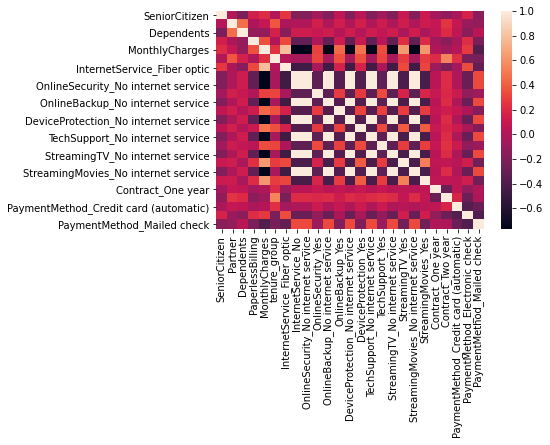

In [54]:
sns.heatmap(X_train.corr())

In [55]:
threshold=0.9

In [56]:
#find correlated Features
def correlation(X_train, threshold):
    col_corr=set()   #set all correlated col names
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  #we are interested in absoulute coeff value
                colname= corr_matrix.columns[i]   #get the name of col
                col_corr.add(colname)
    return col_corr            
                
            

In [57]:
correlation(data.iloc[:,:],threshold)

{'DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

In [58]:
data.drop(['DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'],axis=1,inplace= True)#Remove  highly corelated Features.

In [59]:
from sklearn.feature_selection import mutual_info_classif

In [60]:
mutual_info=mutual_info_classif(X_train,y_train)

In [61]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

tenure_group                             0.065202
Contract_Two year                        0.061261
InternetService_Fiber optic              0.057579
MonthlyCharges                           0.049254
PaymentMethod_Electronic check           0.045183
InternetService_No                       0.033243
StreamingTV_No internet service          0.029417
StreamingMovies_No internet service      0.028394
OnlineSecurity_No internet service       0.026133
TechSupport_No internet service          0.025382
DeviceProtection_No internet service     0.023693
OnlineBackup_No internet service         0.023128
PaymentMethod_Credit card (automatic)    0.022443
SeniorCitizen                            0.021624
PaperlessBilling                         0.020311
Contract_One year                        0.019345
Dependents                               0.013233
OnlineSecurity_Yes                       0.013006
TechSupport_Yes                          0.010518
Partner                                  0.008119


#Train Test split

Scaling independent data only for KNN and SVM algorithms

In [62]:
X_train_Nm,X_test_Nm,y_train_Nm,y_test_Nm=train_test_split(X,y,train_size=0.8,random_state=0)#for over sampling cheak

In [63]:
#scaling for train SVM & KNN Classifier
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define Fuctions For Model Evaluation Metrics
    

In [64]:
#define a function that plot feature wt for a classifier
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind='bar')
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    top_weights_selected.plot(kind='bar')


In [65]:
#define a function that plot confusion matrix for a classifier and accuracy score
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
                          
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score Train: {classifier.score(X_train, y_train)}(as comparision)')
    return print("")

In [66]:
#Define a function that plot ROC curve & AUC Score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')
    

In [67]:
#define a function for precision, recall- curve & f1 score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

# Cross Validation Like KFOLD and Hyperpaqrameter Tuning in Imbalance data

# Logistic Regression Imbalaced

In [68]:
logit=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)

In [69]:
logit=GridSearchCV(logit,grid,cv=cv,n_jobs=-1,scoring='recall')
logit.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=50, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [70]:
y_pred=logit.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[926 112]
 [181 188]]
0.7917555081734187
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1038
           1       0.63      0.51      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

0.700792643764588


In [71]:
y_pred_prob = logit.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Logistic test roc-auc: 0.8317198489903974


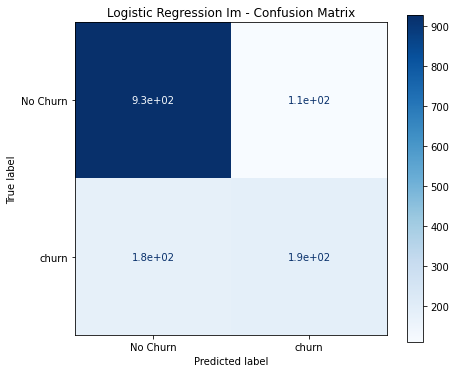

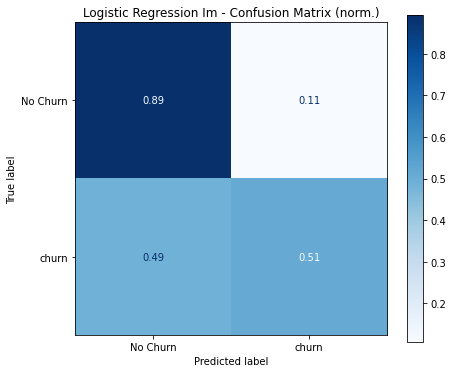

Accuracy Score Test: 0.7917555081734187
Accuracy score Train: 0.5393333333333333(as comparision)



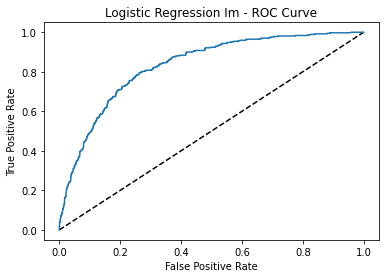

AUC Score (ROC): 0.8317198489903974



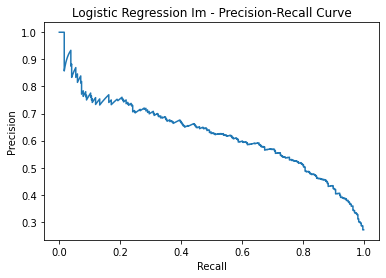

F1 score: 0.5620328849028402 
AUC Score (PR): 0.6228719371724452



In [72]:
#plot Model evaluation
confusion_matrix_plot(X_train, y_train, X_test, y_test, logit, y_pred,'Logistic Regression Im')
roc_curve_auc_score(X_test, y_test, y_pred_prob,'Logistic Regression Im')
precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_prob,'Logistic Regression Im')

# Oversampling

In [73]:
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE

In [74]:
os=SMOTETomek(0.7)
X_train_Tk,y_train_Tk=os.fit_sample(X_train,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Tk)))

The num of classes before fit Counter({0: 4125, 1: 1500})
the num of classes after fit Counter({0: 3939, 1: 2701})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For SVM and KNN classifier

In [75]:
#for SVM and KNN
os=SMOTETomek(0.8)
X_train_Nm_Ov,y_train_Ov=os.fit_sample(X_train_scaled,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Ov)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The num of classes before fit Counter({0: 4125, 1: 1500})
the num of classes after fit Counter({0: 3803, 1: 2978})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Random Forest

In [76]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 30],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,100, 200, 300]
}
# Create a based model
rf_C = RandomForestClassifier()
# Instantiate the grid search model
RF_model = GridSearchCV(estimator = rf_C, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
RF_model .fit(X_train_Tk,y_train_Tk)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 15.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [77]:
RF_model.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [78]:
rf_model=RandomForestClassifier(class_weight={0:1, 1:3}, max_depth = 10,random_state=1,
                                  n_estimators=500, oob_score=True, min_samples_leaf=6, min_samples_split=8)

In [79]:
rf_model .fit(X_train_Tk,y_train_Tk)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [80]:
y_pred=rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[711 327]
 [ 59 310]]
0.7256574271499645
              precision    recall  f1-score   support

           0       0.92      0.68      0.79      1038
           1       0.49      0.84      0.62       369

    accuracy                           0.73      1407
   macro avg       0.71      0.76      0.70      1407
weighted avg       0.81      0.73      0.74      1407

0.7625397496749534


In [81]:
ytrain_pred = rf_model.predict_proba(X_train_Tk)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
y_pred_rf_prob = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_rf_prob[:,1])))

RF train roc-auc: 0.932437226008364
RF test roc-auc: 0.8385158032697861


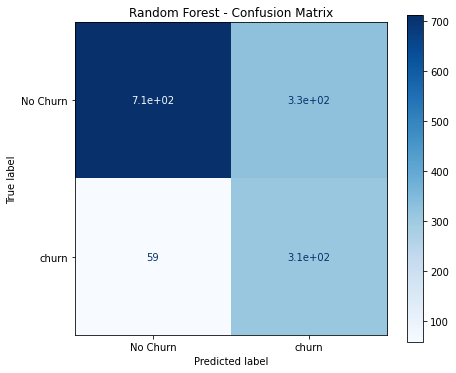

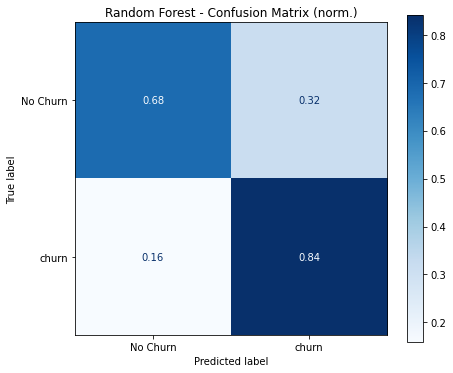

Accuracy Score Test: 0.7256574271499645
Accuracy score Train: 0.817921686746988(as comparision)



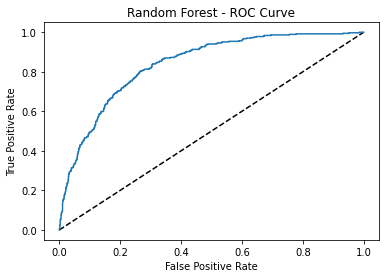

AUC Score (ROC): 0.8385158032697861



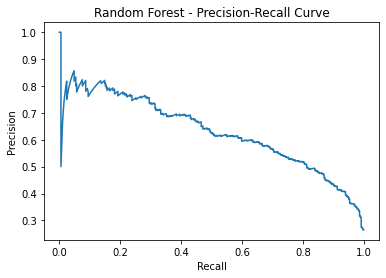

F1 score: 0.6163021868787276 
AUC Score (PR): 0.6305919052113388



In [82]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, rf_model, y_pred,'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob,'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_rf_prob,'Random Forest')


# Logistic regression

In [83]:
log_s=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)

In [84]:
log_S=GridSearchCV(log_s,grid,cv=cv,n_jobs=-1,scoring='recall')
log_S.fit(X_train_Tk,y_train_Tk)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=50, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [85]:
y_pred=log_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[819 219]
 [106 263]]
0.7690120824449183
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1038
           1       0.55      0.71      0.62       369

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407

0.750877234205868


In [86]:
#ytrain_pred = log_S.predict_proba(X_train_Tk)
#print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred)))
ytest_pred_prob = log_S.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_prob[:,1])))

Logistic test roc-auc: 0.8318660546913755


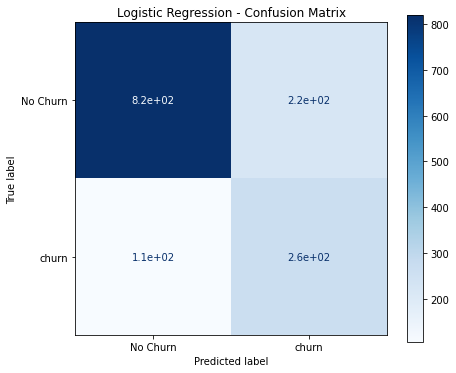

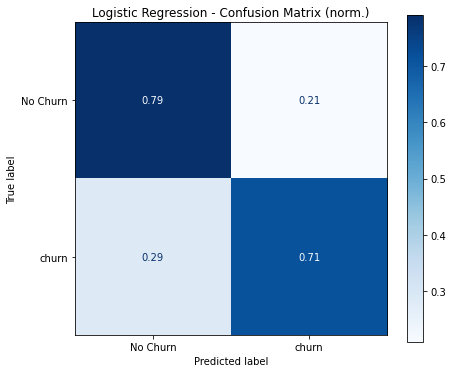

Accuracy Score Test: 0.7690120824449183
Accuracy score Train: 0.7519437245464643(as comparision)



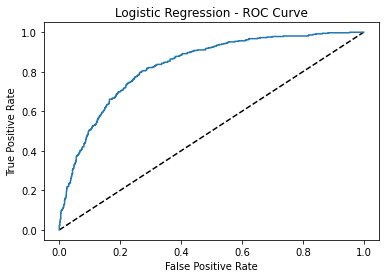

AUC Score (ROC): 0.8318660546913755



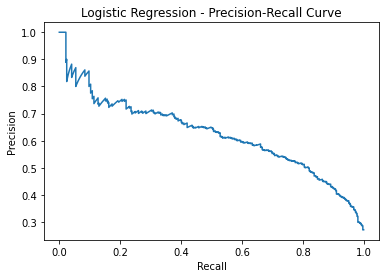

F1 score: 0.618096357226792 
AUC Score (PR): 0.624657623109273



In [87]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, log_S, y_pred,'Logistic Regression')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'Logistic Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'Logistic Regression')

# Ridge Classifier

In [88]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(class_weight='balanced', random_state=42)
RC=rc.fit(X_train_Tk,y_train_Tk)

In [89]:
y_pred=RC.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[752 286]
 [ 74 295]]
0.744136460554371
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1038
           1       0.51      0.80      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407

0.7619640647273525


# Decission Tree

In [90]:
param_g = {
    'max_depth': [8, 15, 30, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
    
ds=DecisionTreeClassifier()
ds = GridSearchCV(estimator = ds, param_grid = param_g, 
                          cv = 10, n_jobs = -1, verbose = 2)
ds.fit(X_train_Tk,y_train_Tk)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8, 15, 30, 50], 'max_features': [2, 3],


In [91]:
y_pred=ds.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[893 145]
 [166 203]]
0.7789623312011372
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1038
           1       0.58      0.55      0.57       369

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407

0.705221893259395


In [92]:
ytrain_pred_prob = ds.predict_proba(X_train_Tk)
print('DecisionTree train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = ds.predict_proba(X_test)
print('DecisionTree test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_prob[:,1])))

DecisionTree train roc-auc: 0.932437226008364
DecisionTree test roc-auc: 0.7817109722156952


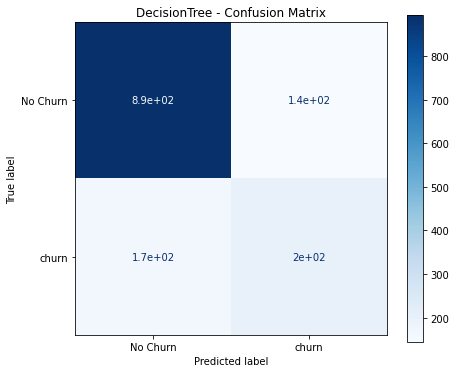

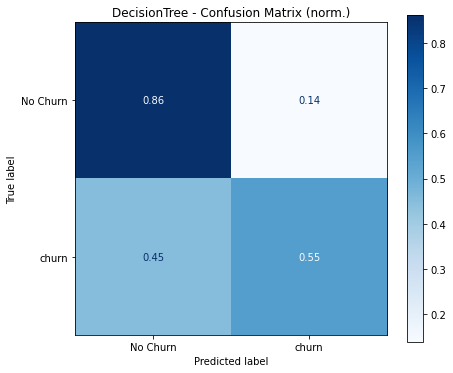

Accuracy Score Test: 0.7789623312011372
Accuracy score Train: 0.8356927710843374(as comparision)



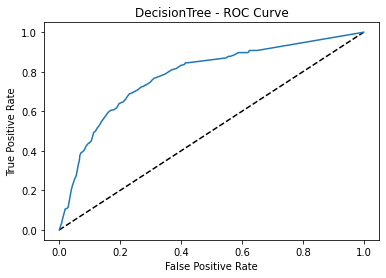

AUC Score (ROC): 0.7817109722156952



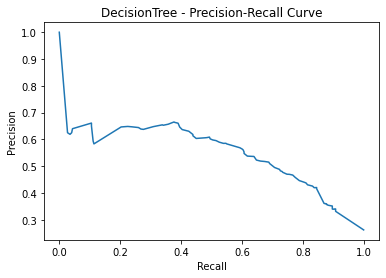

F1 score: 0.5662482566248256 
AUC Score (PR): 0.5499446499555156



In [93]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, ds, y_pred,'DecisionTree')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'DecisionTree')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'DecisionTree')

# Naive Bayes

In [94]:
gnb = GaussianNB()
NB=gnb.fit(X_train_Tk,y_train_Tk)


In [95]:
y_pred=NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[609 429]
 [ 47 322]]
0.6616915422885572
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1038
           1       0.43      0.87      0.57       369

    accuracy                           0.66      1407
   macro avg       0.68      0.73      0.65      1407
weighted avg       0.80      0.66      0.68      1407

0.7296669642997009


In [96]:
ytrain_pred = NB.predict_proba(X_train_Tk)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = NB.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.8491807543753835
Logistic test roc-auc: 0.8123763125877888


# Bagging Classifier

In [97]:
from sklearn.ensemble.bagging import BaggingClassifier
bgc = BaggingClassifier(random_state=124)
BGC=bgc.fit(X_train_Tk,y_train_Tk)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [98]:
y_pred=BGC.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[905 133]
 [194 175]]
0.767590618336887
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1038
           1       0.57      0.47      0.52       369

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407

0.6730618606764103


# XGboost

In [99]:
#hyperparameter tuning
params={
    'learning_rate'   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth'       : [3,4,5,6,8,10,12],
    'min_child_weight': [1,3,5,7],
    'gamma'           : [0.0, 0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [138]:
Xgcls=xgboost.XGBClassifier()
#Xgcls=RandomizedSearchCV(Xgcls,param_distributions=params,scoring='accuracy',cv=10,verbose=3)
Xgcls.fit(X_train_Tk,y_train_Tk)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
Xgcls.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 1}

In [176]:
X_train_Tk.shape

(6640, 25)

In [178]:
y_pred = Xgcls.predict(X_test.values)#convert dataframe to array
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[884 154]
 [146 223]]
0.7867803837953091
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1038
           1       0.59      0.60      0.60       369

    accuracy                           0.79      1407
   macro avg       0.72      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

0.727986904146498


In [181]:
ytrain_pred = random_XGB_Ns.predict_proba(X_train_Tk)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = random_XGB_Ns.predict_proba(X_test.values)
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_prob[:,1])))

XGB train roc-auc: 0.9641179693397245
XGB test roc-auc: 0.8337876153328007


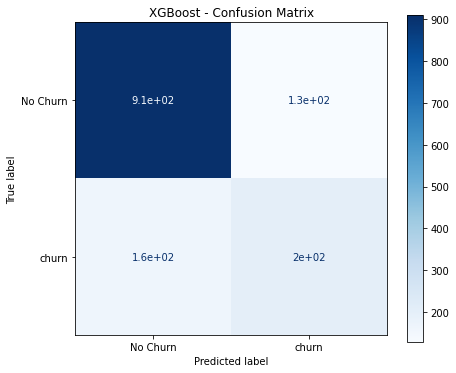

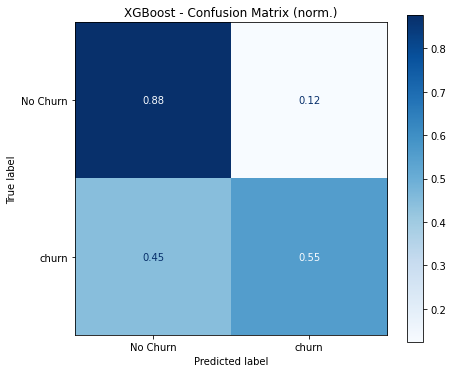

Accuracy Score Test: 0.7867803837953091
Accuracy score Train: 0.8953313253012049(as comparision)



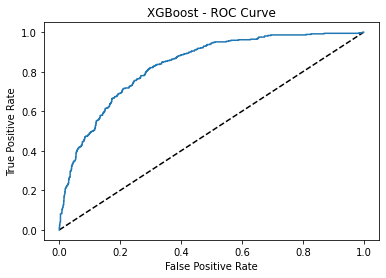

AUC Score (ROC): 0.8337876153328007



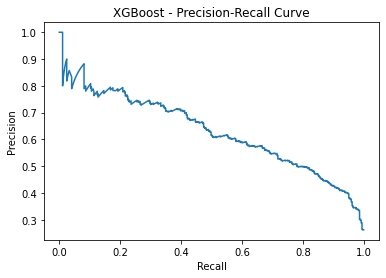

F1 score: 0.5978552278820376 
AUC Score (PR): 0.6306521198782237



In [184]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test.values, y_test, random_XGB_Ns, y_pred,'XGBoost')
roc_curve_auc_score(X_test.values, y_test, ytest_pred_prob,'XGBoost')
precision_recall_curve_and_scores(X_test.values, y_test, y_pred, ytest_pred_prob,'XGBoost')

# LightGBM

In [102]:
gbm = lightgbm.LGBMClassifier(objective='binary',
                        num_leaves=31,
                        metric = 'l2',
                        learning_rate=0.2,
                        n_estimators=5)
gbm.fit(X_train_Tk, y_train_Tk)
        

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               metric='l2', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=5, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [103]:
y_pred=gbm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[899 139]
 [169 200]]
0.7810945273631841
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1038
           1       0.59      0.54      0.56       369

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407

0.7040470260193931


In [104]:
ytrain_pred = gbm.predict_proba(X_train_Tk)
print('L_GB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = gbm.predict_proba(X_test)
print('L_GB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

L_GB train roc-auc: 0.9180988884637332
L_GB test roc-auc: 0.8302708460610618


# Multilayer Perceptron (Neural Network)

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train_Tk,y_train_Tk)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [106]:
y_pred=clf_mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[863 175]
 [127 242]]
0.7853589196872779
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1038
           1       0.58      0.66      0.62       369

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.80      0.79      0.79      1407



In [107]:
ytrain_pred = clf_mlp.predict_proba(X_train_Tk)
print('MLP train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = clf_mlp.predict_proba(X_test)
print('MLP test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

MLP train roc-auc: 0.8739977549146136
MLP test roc-auc: 0.8302708460610618


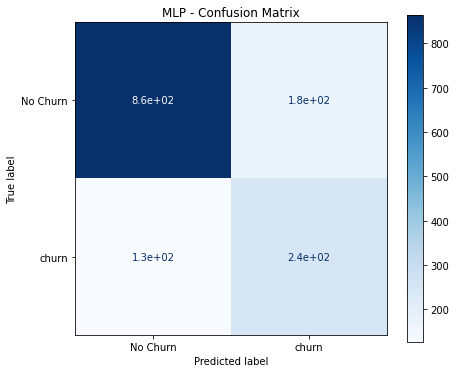

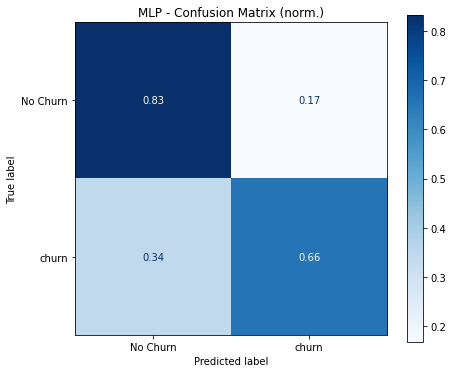

Accuracy Score Test: 0.7853589196872779
Accuracy score Train: 0.7900602409638554(as comparision)



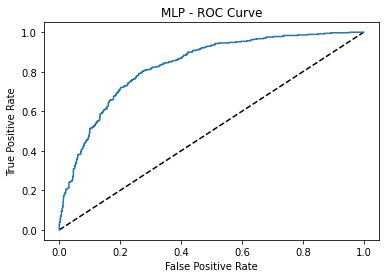

AUC Score (ROC): 0.8308426147845294



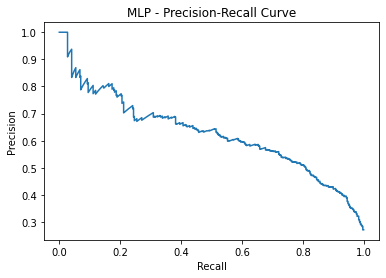

F1 score: 0.6157760814249363 
AUC Score (PR): 0.6260395050351619



In [108]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, clf_mlp, y_pred,'MLP')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'MLP')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'MLP')

# Adaboost

In [109]:
ad_S=AdaBoostClassifier()
ad_S.fit(X_train_Tk,y_train_Tk)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [110]:
y_pred=ad_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[876 162]
 [135 234]]
0.7889125799573561
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1038
           1       0.59      0.63      0.61       369

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.79      0.79      0.79      1407

0.7390384886507825


In [111]:
ytrain_pred = ad_S.predict_proba(X_train_Tk)
print('ADA train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = ad_S.predict_proba(X_test)
print('AdA test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

ADA train roc-auc: 0.9139239658024413
AdA test roc-auc: 0.8302708460610618


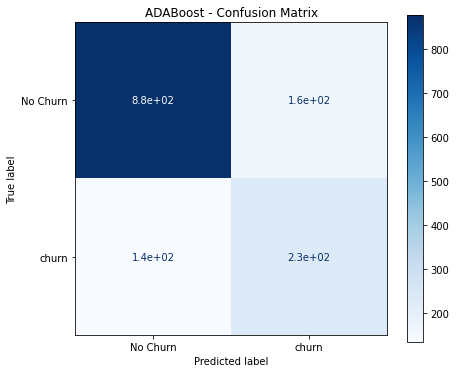

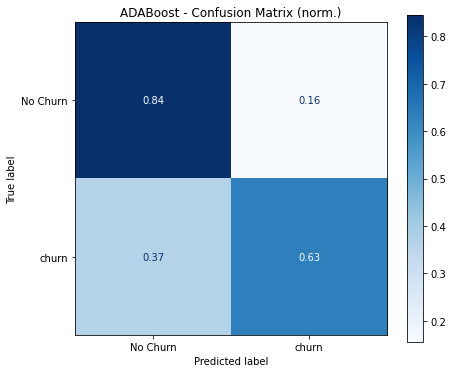

Accuracy Score Test: 0.7889125799573561
Accuracy score Train: 0.8344879518072289(as comparision)



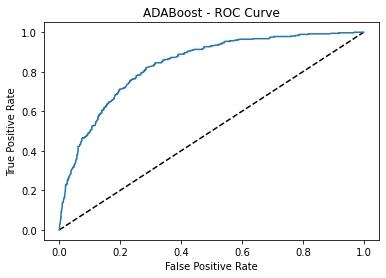

AUC Score (ROC): 0.8362300337839601



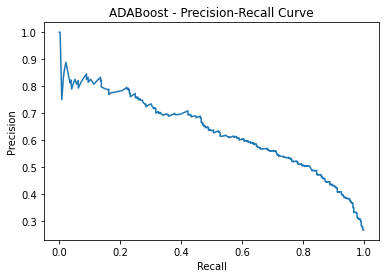

F1 score: 0.611764705882353 
AUC Score (PR): 0.6344557720186724



In [112]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, ad_S, y_pred,'ADABoost')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'ADABoost')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'ADABoost')

# Gradiant Boosting

In [113]:
gbc_S=GradientBoostingClassifier()
gbc_S.fit(X_train_Tk,y_train_Tk)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [114]:
y_pred=gbc_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[887 151]
 [148 221]]
0.7874911158493249
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1038
           1       0.59      0.60      0.60       369

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

0.7267219637514295


In [115]:
ytrain_pred = gbc_S.predict_proba(X_train_Tk)
print('GrB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = gbc_S.predict_proba(X_test)
print('GrB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

GrB train roc-auc: 0.9321104639156993
GrB test roc-auc: 0.8355929946582703


# CatBoost

In [116]:
cbt_S=CatBoostClassifier()

cbt_S.fit(X_train_Tk,y_train_Tk)

Learning rate set to 0.023121
0:	learn: 0.6795594	total: 58.8ms	remaining: 58.8s
1:	learn: 0.6668020	total: 65.1ms	remaining: 32.5s
2:	learn: 0.6530951	total: 71.1ms	remaining: 23.6s
3:	learn: 0.6389317	total: 77ms	remaining: 19.2s
4:	learn: 0.6264757	total: 83ms	remaining: 16.5s
5:	learn: 0.6150026	total: 89.1ms	remaining: 14.8s
6:	learn: 0.6038280	total: 97.3ms	remaining: 13.8s
7:	learn: 0.5927248	total: 103ms	remaining: 12.8s
8:	learn: 0.5834916	total: 109ms	remaining: 12s
9:	learn: 0.5735818	total: 116ms	remaining: 11.5s
10:	learn: 0.5657311	total: 122ms	remaining: 10.9s
11:	learn: 0.5577688	total: 128ms	remaining: 10.5s
12:	learn: 0.5511365	total: 134ms	remaining: 10.2s
13:	learn: 0.5433607	total: 140ms	remaining: 9.86s
14:	learn: 0.5375292	total: 146ms	remaining: 9.6s
15:	learn: 0.5309603	total: 152ms	remaining: 9.38s
16:	learn: 0.5251002	total: 158ms	remaining: 9.16s
17:	learn: 0.5199487	total: 165ms	remaining: 8.98s
18:	learn: 0.5140713	total: 171ms	remaining: 8.81s
19:	learn: 

In [117]:
y_pred=cbt_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[900 138]
 [170 199]]
0.7810945273631841
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1038
           1       0.59      0.54      0.56       369

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407

0.7031737080376583


In [118]:
ytrain_pred =cbt_S.predict_proba(X_train_Tk)
print('CTB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = cbt_S.predict_proba(X_test)
print('CTB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

CTB train roc-auc: 0.9634132666819497
CTB test roc-auc: 0.8266313684331448


#try svm and Knn

# SVM

In [119]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [120]:
svm=SVC()
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
grid.fit(X_train_Nm_Ov,y_train_Ov) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.786, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.768, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.817, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.834, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.801, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.779, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.799, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.800, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [121]:
y_pred=grid.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[864 174]
 [164 205]]
0.759772565742715
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1038
           1       0.54      0.56      0.55       369

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407

0.6939627488760437


# KNN

In [122]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [123]:
knn_cl=KNN()
knn_cl = GridSearchCV(knn_cl,hyperparameters)
    
knn_cl.fit(X_train_Nm_Ov,y_train_Ov) 

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [124]:
knn_cl.best_params_

{'leaf_size': 43, 'n_neighbors': 1, 'p': 1}

In [125]:
y_pred=knn_cl.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[833 205]
 [180 189]]
0.7263681592039801
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1038
           1       0.48      0.51      0.50       369

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407

0.6573499694534517


In [126]:
ytest_pred_prob = knn_cl.predict_proba(X_test_scaled)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_prob[:,1])))

KNN test roc-auc: 0.6573499694534517


# ALL SCORES


In [129]:
# the function that prints all scores
def print_scores(headline, y_test, y_pred):
    print(headline)
    acc_score = accuracy_score(y_test, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_test, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_test, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_test, y_pred, average='weighted')
    print("f1_score: ",f_score)
    r_auc_score = roc_auc_score(y_test, y_pred)
    print("roc auc_score: ",r_auc_score)

In [185]:
print_scores("Logistic Regression;",y_test, log_S.predict(X_test))
print_scores("Logistic Regression Imbalace;",y_test, logit.predict(X_test))
print_scores("SVC;",y_test, grid.predict(X_test_scaled))
print_scores("KNN;",y_test, knn_cl.predict(X_test_scaled))
print_scores("Naive Bayes;",y_test, NB.predict(X_test))
print_scores("Decision Tree;",y_test, ds.predict(X_test))
print_scores("Random Forest;",y_test, rf_model.predict(X_test))
print_scores("CatBoostClassifier;",y_test, cbt_S.predict(X_test))
print_scores("GradientBoostingClassifier;",y_test, gbc_S.predict(X_test))
print_scores("AdaBoostClassifier;",y_test, ad_S.predict(X_test))
print_scores("XGBClassifier;",y_test, random_XGB_Ns.predict(X_test.values))
print_scores("MLPClassifier;",y_test, clf_mlp.predict(X_test))
print_scores("LGBClassifier;",y_test, gbm.predict(X_test))
print_scores("Ridge Classifier;",y_test, rc.predict(X_test))
print_scores("Bagging Classifier;",y_test, bgc.predict(X_test))

Logistic Regression;
accuracy:  0.7690120824449183
precision:  0.5456431535269709
recall:  0.7127371273712737
f1_score:  0.777699538863486
roc auc_score:  0.750877234205868
Logistic Regression Imbalace;
accuracy:  0.7917555081734187
precision:  0.6266666666666667
recall:  0.5094850948509485
f1_score:  0.7843658293828965
roc auc_score:  0.700792643764588
SVC;
accuracy:  0.759772565742715
precision:  0.5408970976253298
recall:  0.5555555555555556
f1_score:  0.760796981151702
roc auc_score:  0.6939627488760437
KNN;
accuracy:  0.7263681592039801
precision:  0.4796954314720812
recall:  0.5121951219512195
f1_score:  0.7291833141913922
roc auc_score:  0.6573499694534517
Naive Bayes;
accuracy:  0.6616915422885572
precision:  0.42876165113182424
recall:  0.8726287262872628
f1_score:  0.6812406386015611
roc auc_score:  0.7296669642997009
Decision Tree;
accuracy:  0.7789623312011372
precision:  0.5833333333333334
recall:  0.5501355013550135
f1_score:  0.7768321473355659
roc auc_score:  0.70522189

In [186]:
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import cross_val_score

In [143]:
recal=make_scorer(recall_score)

# Voting Classifier

In [144]:
clf1= AdaBoostClassifier()
clf2= LogisticRegression()
clf3= MLPClassifier(verbose=0)
clf4= RandomForestClassifier()



print('5-fold cross validation:/n')
labels = ['AdaBoost','Logistic Regression','MLP','random Forest']

for clf, label in zip([clf1,clf2,clf3,clf4],labels):
    scores =cross_val_score(clf,X_train_Tk,y_train_Tk,cv=5,scoring='recall')
    
    print("Accuracy: %0.2f (+/- %0.2f)[%s]"
         %(scores.mean(),scores.std(), label))

5-fold cross validation:/n
Accuracy: 0.78 (+/- 0.13)[AdaBoost]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.75 (+/- 0.03)[Logistic Regression]
Accuracy: 0.73 (+/- 0.05)[MLP]
Accuracy: 0.76 (+/- 0.19)[random Forest]


In [145]:
voting_clf_hard =  VotingClassifier(estimators = [(labels[0], clf1),
                                                  (labels[1], clf2),
                                       (labels[2], clf3),(labels[3], clf4)],
                                       
                                                 
                                    voting = 'hard')

In [146]:
voting_clf_hard.fit(X_train_Tk, y_train_Tk)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('AdaBoost',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_sta...
                                                 

In [147]:
y_pred=voting_clf_hard.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[866 172]
 [130 239]]
0.7853589196872779
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1038
           1       0.58      0.65      0.61       369

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.79      0.79      0.79      1407

0.7409966007174523


In [148]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                  (labels[1], clf2),
                                                  (labels[2], clf3),
                                                  (labels[3], clf4)],
                                                  
                                                  
                                    voting = 'soft')

In [149]:
voting_clf_soft.fit(X_train_Tk, y_train_Tk)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('AdaBoost',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_sta...
                                                 

In [150]:
y_pred=voting_clf_soft.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[874 164]
 [137 232]]
0.7860696517412935
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1038
           1       0.59      0.63      0.61       369

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.79      0.79      0.79      1407

0.7353650704137098


In [151]:
ytest_pred_prob = voting_clf_soft.predict_proba(X_test)
print('Voting_soft test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Voting_soft test roc-auc: 0.8266313684331448


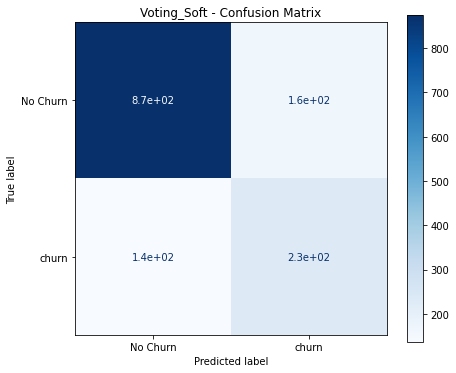

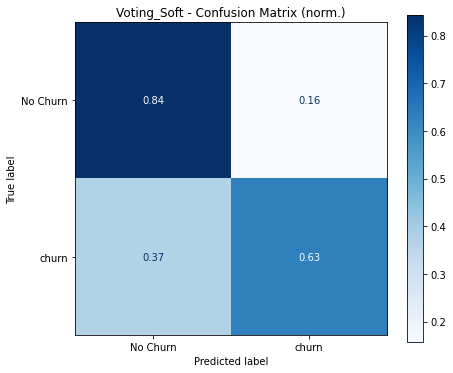

Accuracy Score Test: 0.7860696517412935
Accuracy score Train: 0.8923192771084337(as comparision)



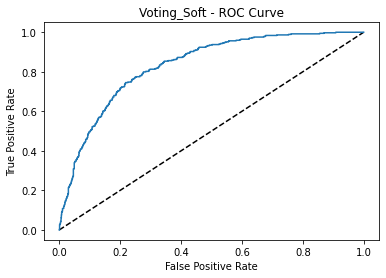

AUC Score (ROC): 0.8327171807363545



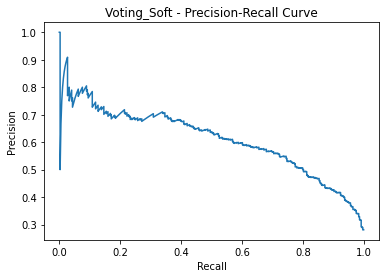

F1 score: 0.6065359477124183 
AUC Score (PR): 0.6101044600388731



In [152]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, voting_clf_soft, y_pred,'Voting_Soft')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'Voting_Soft')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'Voting_Soft')

# Save Model and partial dependence plot




Save Random Forest Model

In [153]:
pickle.dump(rf_model, open('Model.pkl','wb'))

In [158]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_plots

In [160]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top = 19)

Weight,Feature
0.0111 ± 0.0031,Contract_One year
0.0044 ± 0.0111,tenure_group
0.0034 ± 0.0061,InternetService_Fiber optic
0.0034 ± 0.0019,PaymentMethod_Credit card (automatic)
0.0020 ± 0.0070,PaymentMethod_Electronic check
0.0018 ± 0.0100,Contract_Two year
0.0014 ± 0.0025,SeniorCitizen
0.0010 ± 0.0034,DeviceProtection_Yes
0.0006 ± 0.0078,OnlineSecurity_Yes
0.0000 ± 0.0034,PaperlessBilling


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


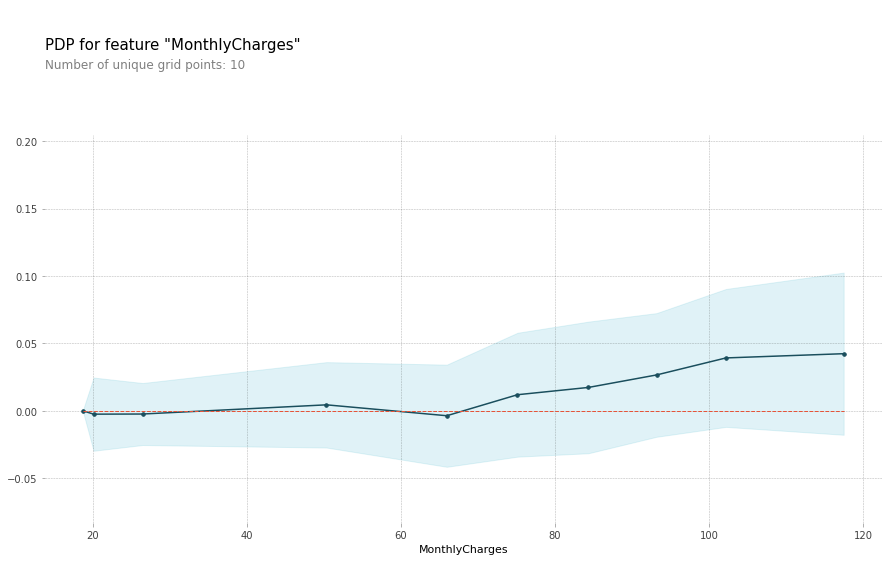

In [161]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=X_test.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

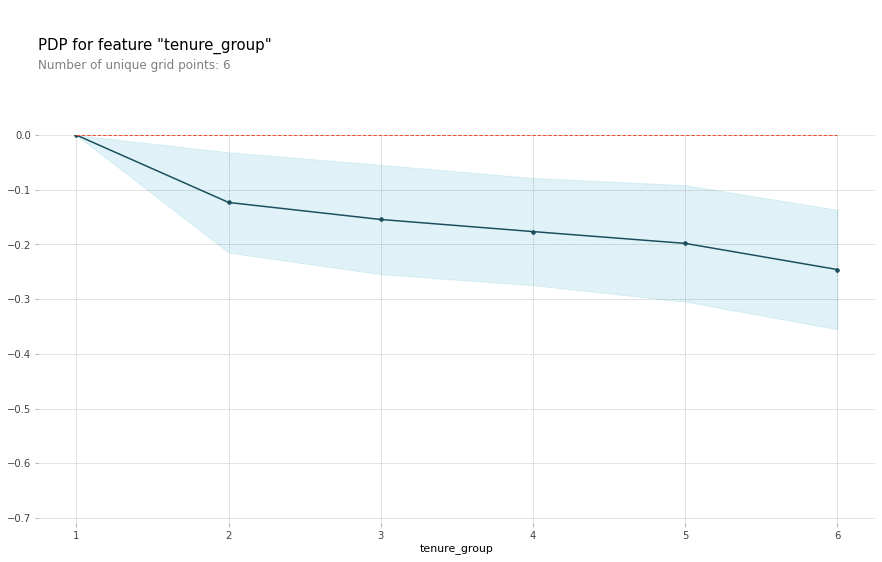

In [162]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=X_test.columns.values, feature='tenure_group')
pdp.pdp_plot(pdp_p, 'tenure_group')
plt.show()

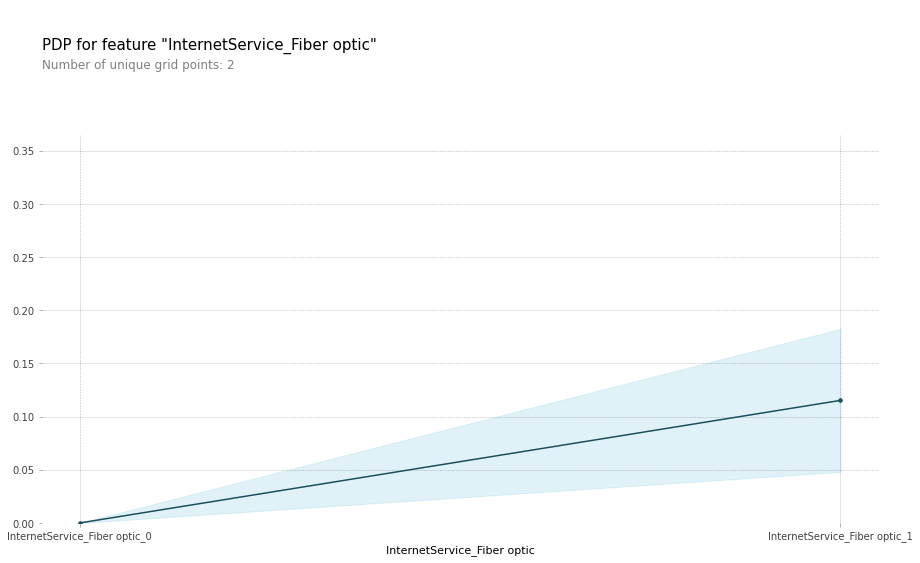

In [163]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=X_test.columns.values, feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

In [164]:
X_test.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'MonthlyCharges', 'tenure_group', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [167]:
import shap
shap.initjs()

In [168]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

In [169]:
import joblib

In [170]:
# Saving Explainer
ex_filename = 'explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))

['explainer.bz2']

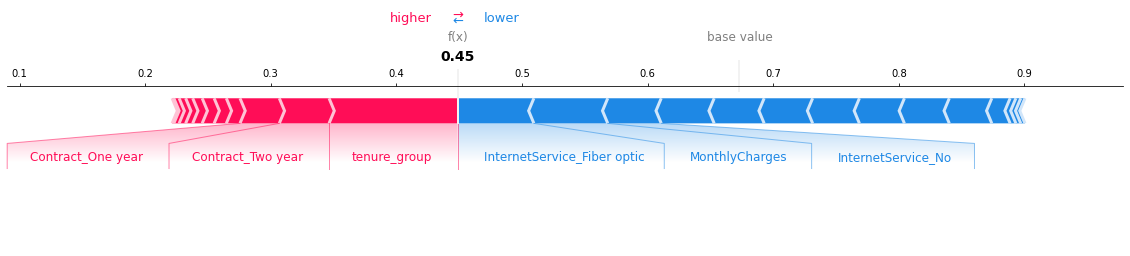

In [171]:
explainer = joblib.load(filename="explainer.bz2")
shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], list(X_test.columns), 
                matplotlib = True, show = False).savefig('shap.png', bbox_inches="tight")

# Dial Chart

In [172]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]
        

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

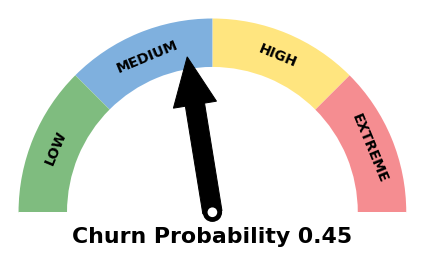

In [173]:
gauge(Probability=rf_model.predict_proba(X_test.iloc[0:1])[0,1])